Enter Degree: 3
For svar-set1.dat


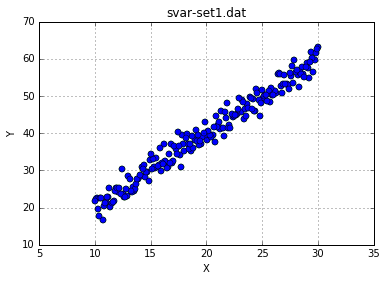

Theta: [-11.83040  3.99671 -0.10493  0.00173]
MSE with defined algorithm: 4.44976586085
MSE With Readymade Function: 4.36875256474
MSE with Reduced Traing Data: 4.21425175252


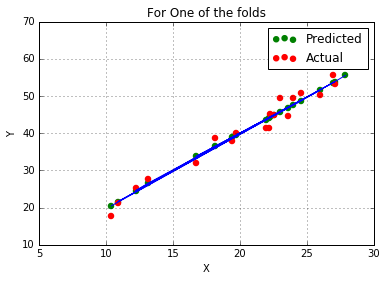

For svar-set2.dat


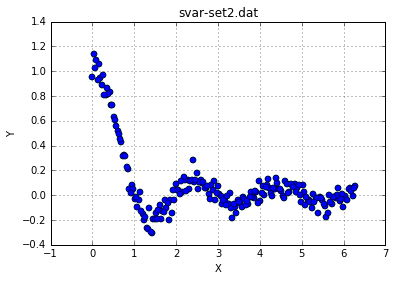

Theta: [ 0.99849 -1.05577  0.31689 -0.02846]
MSE with defined algorithm: 0.021370426046
MSE With Readymade Function: 0.061200692676
MSE with Reduced Traing Data: 0.0189648710986


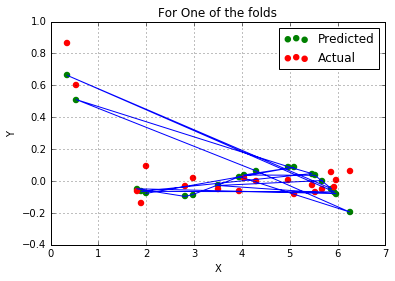

For svar-set3.dat


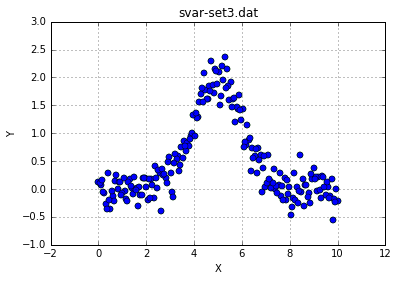

Theta: [-0.59459  0.66051 -0.06695  0.00007]
MSE with defined algorithm: 0.262182711888
MSE With Readymade Function: 0.504339248263
MSE with Reduced Traing Data: 0.304931547546


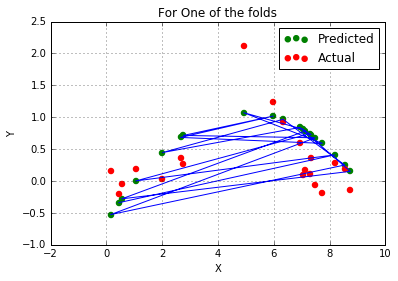

For svar-set4.dat


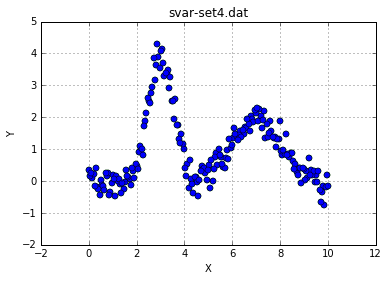

Theta: [-0.39888  0.98910 -0.14489  0.00504]
MSE with defined algorithm: 0.938203377002
MSE With Readymade Function: 1.21228704771
MSE with Reduced Traing Data: 1.1623516602


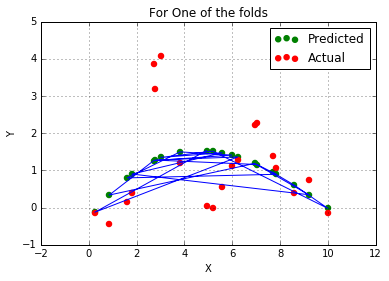

In [21]:
import numpy as np
import math
import urllib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as m_s_e
from sklearn import linear_model
%matplotlib inline

# Ready made function for Linear Regression
def readymade(x,y,x_test,y_test):
    mse1=0
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    x_test=x_test.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    prediction= regr.predict(x_test)
    mse1=mse1+m_s_e(y_test,prediction)
    return mse1
    
    

# function for plotting data of all files
def plot_initial(x,y,name,d):
    plt.plot(x,y,'bo')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(name)
    plt.scatter(x,y,marker='o',color='g',linewidths=2)
    plt.grid(True)
    if(name=='svar-set1.dat'):
        plt.savefig("plot"+name+str(d)+".png")
    if(name=='svar-set2.dat'):
        plt.savefig("plot"+name+str(d)+".png")
    if(name=='svar-set3.dat'):
        plt.savefig("plot"+name+str(d)+".png")
    if(name=='svar-set4.dat'):
        plt.savefig("plot"+name+str(d)+".png")
    plt.show()   
    

# function to plot data after applying model
def plot_later(x,y,pred,name,d):    
    plt.plot(x,pred)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('For One of the folds')
    plt.scatter(x,pred,marker='o',color='g',linewidths=2,label='Predicted')
    plt.scatter(x,y,marker='o',color='r',linewidths=2,label='Actual')
    plt.legend()
    plt.grid(True)
    if(name=='svar-set1.dat'):
        plt.savefig("plotLater"+name+str(d)+".png")
    if(name=='svar-set2.dat'):
        plt.savefig("plotLater"+name+str(d)+".png")
    if(name=='svar-set3.dat'):
        plt.savefig("plotLater"+name+str(d)+".png")
    if(name=='svar-set4.dat'):
        plt.savefig("plotLater"+name+str(d)+".png")
    plt.show()   
    
    
# Creating 10 folds and fitting model on each training set
# Gives average error of 10 folds
def k_fold(X, Y, k_fold,deg):
    fold_size = len(X) / k_fold  
    for itr in xrange(1,deg+1):
        err=0
        errForReadymade=0
        th=0
        for k in range(k_fold):
            X_train = np.append(X[:k * fold_size], X[(k + 1) * fold_size:])
            X_test = X[k * fold_size:][:fold_size]
            Y_train = np.append(Y[:k * fold_size], Y[(k + 1) * fold_size:])
            Y_test = Y[k * fold_size:][:fold_size]
            y_hat,theta,mse=fit_model(deg,X_train,Y_train,X_test,Y_test)
#             plot_later(X_test,Y_test,y_hat,k)
            mse1=readymade(X_train,Y_train,X_test,Y_test)
            err=err+mse
            errForReadymade=errForReadymade+mse1
            th=th+theta
        err=err/k_fold
        errForReadymade=errForReadymade/k_fold
        th=th/k_fold
    print 'Theta:',th 
    print 'MSE with defined algorithm:',err
    print 'MSE With Readymade Function:',errForReadymade
    return X_test,Y_test,y_hat

# Function for applying model on each training set
def fit_model(deg,x,y,x_test,y_test):
    mse=0
    ListA= [sum( map(lambda x:x**i,x)) for i in range(0,(deg*2)+1)]
    MA = [ListA[i:(i+deg+1)]for i in range(0,deg+1)]
#     print MA
    ListB= [sum([(valueX*y[index])for index ,valueX in enumerate(map(lambda x:x**i,x))]) for i in range(0,(deg)+1)] 
    A = np.matrix(MA)
    b=np.array(ListB)
    theta= np.linalg.solve(A,b.T)
    y_hat= [sum([theta[j]*(i**j)for j in range(0,deg+1)] )for i in x_test]   
    y_hat=np.array(y_hat)
    mse=mse+m_s_e(y_test,y_hat)
    np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
    return y_hat,theta, mse
    
# Function for applying model on reduced training data
def reducedTrain(x,y,deg):
#     x_tr = x[:(-(int)(len(x)*0.25))]
    x_tr=np.append(x[:0], x[:150])
#     print x_tr
    x_te = x[(-(int)(len(x)*0.25)):]
    y_tr = y[:(-(int)(len(y)*0.25))]
    y_te = y[(-(int)(len(y)*0.25)):]
    mse=0
    ListA= [sum( map(lambda x:x**i,x_tr)) for i in range(0,(deg*2)+1)]
    MA = [ListA[i:(i+deg+1)]for i in range(0,deg+1)]
#     print MA
    ListB= [sum([(valueX*y_tr[index])for index ,valueX in enumerate(map(lambda x:x**i,x_tr))]) for i in range(0,(deg)+1)] 
    A = np.matrix(MA)
    b=np.array(ListB)
    theta= np.linalg.solve(A,b.T)
    y_hat= [sum([theta[j]*(i**j)for j in range(0,deg+1)] )for i in x_te]  
    y_hat=np.array(y_hat)
#     print x.shape, y_hat.shape
    mse=mse+m_s_e(y_te,y_hat)
    print 'MSE with Reduced Traing Data:',mse
    np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
#     print x_tr.shape, x_te.shape
    
    

def main():
    Deg = input("Enter Degree: ")
    url1 = "http://cs.iit.edu/~agam/cs584/data/regression/svar-set1.dat"
    url2="http://cs.iit.edu/~agam/cs584/data/regression/svar-set2.dat"
    url3="http://cs.iit.edu/~agam/cs584/data/regression/svar-set3.dat"
    url4="http://cs.iit.edu/~agam/cs584/data/regression/svar-set4.dat"
    urlList=[url1,url2,url3,url4]
    for data in urlList:  
        string=data.split("/")
        name=string[-1]
        print "For "+name
        data1 = urllib.urlopen(data)
        dataset = np.loadtxt(data1)
        X = dataset[:,0:1]
        Y = dataset[:,1]
#         print X[20:]
        plot_initial(X,Y,name,Deg)
        x,y,y_hat=k_fold(X,Y,10,Deg)
        reducedTrain(X,Y,Deg)
        plot_later(x,y,y_hat,name,Deg)
#         z=[map(lambda x:x**i,X) for i in range(0,(Deg+1))]
#         z=np.array(z)
 #       print z.shape

       

        

    
if __name__ == "__main__":main()